# Import libraries and packages

In [1]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
import pandas as pd 
import warnings

# Data Exploration & Cleaning - 1

In [2]:
df= pd.read_csv("feedback.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
text     5000 non-null object
label    5000 non-null int64
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [4]:
df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [5]:
#df['label'] = df['Text Label'].map({'Non-Bullying': 0, 'Bullying': 1})
df['message'] = df['text']
#df.drop(['Text Label','Tweet'],axis=1,inplace=True)

# Visualization

In [6]:
import seaborn as sns
sns.countplot(x="label", data = df)

<AxesSubplot:xlabel='label', ylabel='count'>

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [8]:
comment_words = ''
stopwords = set(STOPWORDS)

In [9]:
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [10]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

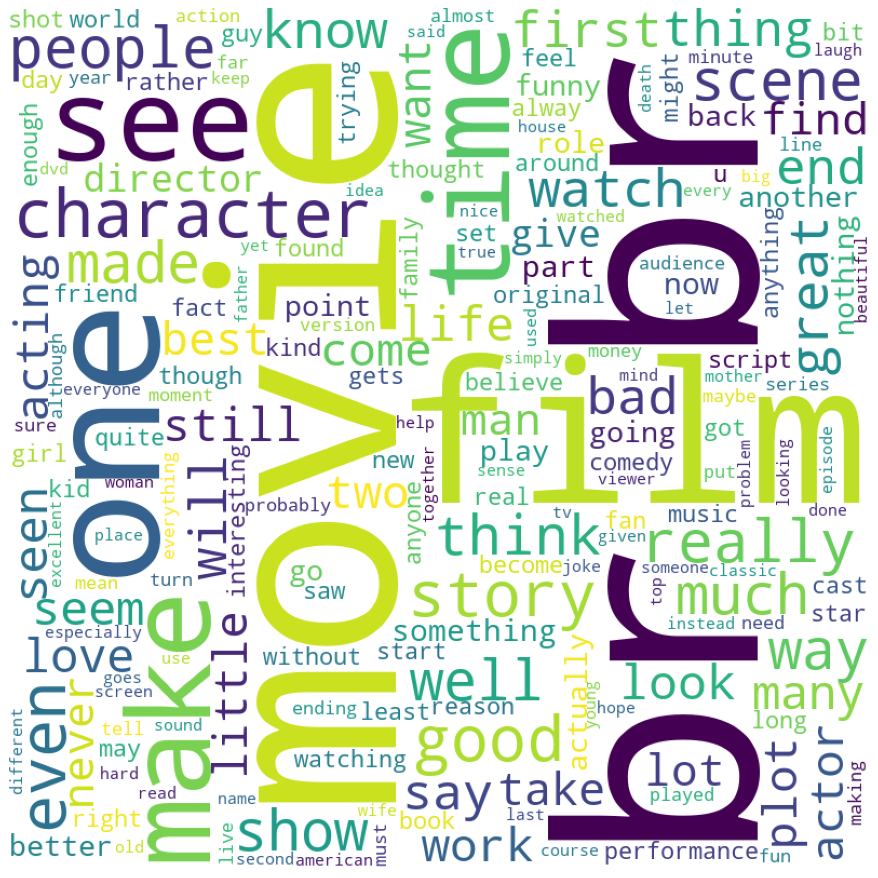

In [11]:
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Feature Selection - Formal DAta

In [12]:
X = df['message']
y = df['label']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the Sentence

In [14]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

# Splitting Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
print(X_test.shape)
print(y_test.shape)

(1650, 38726)
(1650,)


# Machine Learning

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train) 
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)

[[704 130]
 [115 701]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       834
           1       0.84      0.86      0.85       816

    accuracy                           0.85      1650
   macro avg       0.85      0.85      0.85      1650
weighted avg       0.85      0.85      0.85      1650

0.8515151515151516


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=10, random_state=0)
RandomForest.fit(X_train, y_train) 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)

[[704 130]
 [115 701]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       834
           1       0.84      0.86      0.85       816

    accuracy                           0.85      1650
   macro avg       0.85      0.85      0.85      1650
weighted avg       0.85      0.85      0.85      1650

0.8515151515151516


# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
AdaBoost = DecisionTreeClassifier()
AdaBoost.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)

[[608 226]
 [243 573]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       834
           1       0.72      0.70      0.71       816

    accuracy                           0.72      1650
   macro avg       0.72      0.72      0.72      1650
weighted avg       0.72      0.72      0.72      1650

0.7157575757575757


# Multinomial Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train, y_train)
y_pred = MultinomialNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
MNB = accuracy_score(y_test, y_pred)

[[726 108]
 [164 652]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       834
           1       0.86      0.80      0.83       816

    accuracy                           0.84      1650
   macro avg       0.84      0.83      0.83      1650
weighted avg       0.84      0.84      0.83      1650

0.8351515151515152


# Support Vector Machine

In [22]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
svm = accuracy_score(y_test, y_pred)

[[321 513]
 [ 88 728]]
              precision    recall  f1-score   support

           0       0.78      0.38      0.52       834
           1       0.59      0.89      0.71       816

    accuracy                           0.64      1650
   macro avg       0.69      0.64      0.61      1650
weighted avg       0.69      0.64      0.61      1650

0.6357575757575757


# CAT Boosting

In [23]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
cat = accuracy_score(y_test, y_pred)

[[662 172]
 [115 701]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       834
           1       0.80      0.86      0.83       816

    accuracy                           0.83      1650
   macro avg       0.83      0.83      0.83      1650
weighted avg       0.83      0.83      0.83      1650

0.826060606060606


# Voting Classifier

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.svm import SVC
seed = 7
kfold = model_selection.KFold(n_splits=10)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', RandomForestClassifier()),
                             ('svm', SVC())])
[[667 167]
 [105 711]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       834
           1       0.81      0.87      0.84       816

    accuracy                           0.84      1650
   macro avg       0.84      0.84      0.84      1650
weighted avg       0.84      0.84      0.83      1650

0.8351515151515152


# Deep Learning

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, callbacks
from tensorflow.keras import Model, Sequential

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import string

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruProjects\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
df = pd.read_csv('feedback.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
text     5000 non-null object
label    5000 non-null int64
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [30]:
num_classes = df.label.nunique()
print(num_classes)

2


In [31]:
def cleaning_text(text):
    stop_words = stopwords.words("english")

    text = re.sub(r'http\S+', " ", text)    # remove urls
    text = re.sub(r'@\w+',' ',text)         # remove mentions
    text = re.sub(r'#\w+', ' ', text)       # remove hastags
    text = re.sub('r<.*?>',' ', text)       # remove html tags
    
    # remove stopwords 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])

    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    
    return text

In [32]:
df['text'] = df['text'].apply(lambda x: cleaning_text(x))

In [33]:
# Maximum sentence length
max_len_words = max(list(df['text'].apply(len)))
print(max_len_words)

6356


In [34]:
def tokenizer(x_train, y_train, max_len_word):
    # because the data distribution is imbalanced, "stratify" is used
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                      test_size=.2, shuffle=True, 
                                                      stratify=y_train, random_state=0)

    # Tokenizer
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(X_train)
    sequence_dict = tokenizer.word_index
    word_dict = dict((num, val) for (val, num) in sequence_dict.items())

    # Sequence data
    train_sequences = tokenizer.texts_to_sequences(X_train)
    train_padded = pad_sequences(train_sequences,
                                 maxlen=max_len_word,
                                 truncating='post',
                                 padding='post')
    
    val_sequences = tokenizer.texts_to_sequences(X_val)
    val_padded = pad_sequences(val_sequences,
                                maxlen=max_len_word,
                                truncating='post',
                                padding='post', )
    
    print(train_padded.shape)
    print(val_padded.shape)
    print('Total words: {}'.format(len(word_dict)))
    return train_padded, val_padded, y_train, y_val, word_dict

X_train, X_val, y_train, y_val, word_dict = tokenizer(df.text, df.label, 100)

(4000, 100)
(1000, 100)
Total words: 45474


# RNN

In [35]:
import tensorflow as tf
model = Sequential([
    layers.Embedding(5000, 100, input_length=100),
    layers.SimpleRNN(64, return_sequences=True, recurrent_dropout=0.4),
    layers.GlobalAveragePooling1D(),    # or layers.Flatten()
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

In [36]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [37]:
trained = model.fit(X_train, y_train,
                    epochs=10, 
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/10
125/125 [==============================] - 4s 35ms/step - loss: 0.6961 - accuracy: 0.4753 - val_loss: 0.6927 - val_accuracy: 0.4960
Epoch 2/10
125/125 [==============================] - 4s 34ms/step - loss: 0.6925 - accuracy: 0.5163 - val_loss: 0.6917 - val_accuracy: 0.5130
Epoch 3/10
125/125 [==============================] - 4s 34ms/step - loss: 0.6928 - accuracy: 0.5082 - val_loss: 0.6911 - val_accuracy: 0.5350
Epoch 4/10
125/125 [==============================] - 4s 34ms/step - loss: 0.6936 - accuracy: 0.5123 - val_loss: 0.6925 - val_accuracy: 0.5030
Epoch 5/10
125/125 [==============================] - 4s 34ms/step - loss: 0.6913 - accuracy: 0.5238 - val_loss: 0.8228 - val_accuracy: 0.5030
Epoch 6/10
125/125 [==============================] - 4s 34ms/step - loss: 0.6897 - accuracy: 0.5362 - val_loss: 0.8446 - val_accuracy: 0.5030
Epoch 7/10
125/125 [==============================] - 4s 33ms/step - loss: 0.6858 - accuracy: 0.5520 - val_loss: 0.6735 - val_accuracy: 0.6340

In [38]:
rnn = trained.history['val_accuracy']

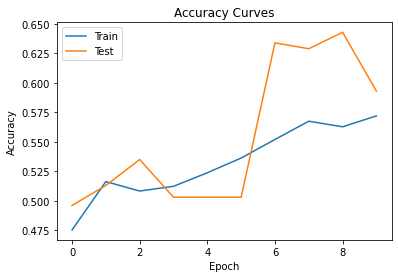

In [39]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

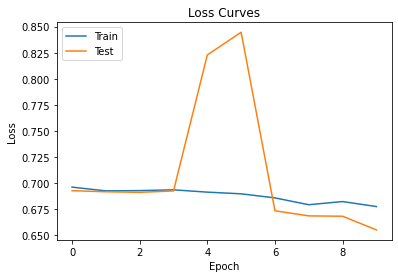

In [40]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CNN

In [41]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(5000, 100, input_length=100))


    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))
    #model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    
    model.add(Dense(units=num_classes,activation="softmax"))
    
    optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=tf.keras.losses.SparseCategoricalCrossentropy())
    return model

Using TensorFlow backend.


In [42]:
cnn_model = build_cnn_model()

In [43]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=10, 
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/10
125/125 [==============================] - 1s 5ms/step - loss: 24.3253 - accuracy: 0.4938 - val_loss: 521.5866 - val_accuracy: 0.4990
Epoch 2/10
125/125 [==============================] - 1s 4ms/step - loss: 21.1084 - accuracy: 0.4905 - val_loss: 646.1887 - val_accuracy: 0.4820
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 16.5554 - accuracy: 0.4970 - val_loss: 471.4706 - val_accuracy: 0.4920
Epoch 4/10
125/125 [==============================] - 1s 4ms/step - loss: 16.2674 - accuracy: 0.5013 - val_loss: 180.9798 - val_accuracy: 0.5060
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 15.5884 - accuracy: 0.5010 - val_loss: 264.9652 - val_accuracy: 0.4880
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 11.6513 - accuracy: 0.5033 - val_loss: 333.9930 - val_accuracy: 0.4820
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 11.4186 - accuracy: 0.5058 - val_loss: 997.8661 - val_ac

In [44]:
cnn = cnn_history.history['val_accuracy']

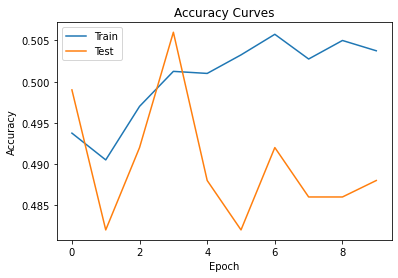

In [45]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

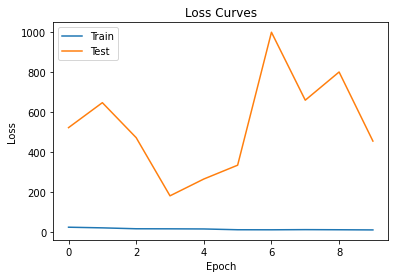

In [46]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# LSTM

In [47]:

#importing libraries for model evaluation and algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import nltk
from sklearn import preprocessing
from nltk.tokenize import sent_tokenize, word_tokenize
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#dl libraraies
import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization,Reshape,Dot,Concatenate,Add,Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
#import cv2
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import os
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.layers.recurrent import LSTM
from keras.preprocessing.sequence import pad_sequences
# specifically for deeplearning.
from tensorflow.keras.layers import Dropout, Flatten,Activation,Input,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [48]:
#reading the dataframe
df=pd.read_csv('feedback.csv')
df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [49]:
#Setting parameters which will be used throughout
num_words = 15000  # Parameter indicating the number of words we'll put in the dictionary
val_size = 1000  # Size of the validation set
epochs = 20  # Number of epochs we usually start to train with
batch_size = 512  # Size of the batches used in the mini-batch gradient descent
#Taking only two columns since it's a sentiment analysis

In [50]:
#tweets conssits of every document as an array of tokenized words which are later appended to docs 
tweets=[word_tokenize(tweet) for tweet in df['text']]
docs=[]
for j in range(0,len(tweets)):
    docs.append(tweets[j])

In [51]:
#stops included both the stopwords and punctuations
from nltk.corpus import stopwords
import string
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
not_list = ["n't", "not", "no"]
stops.update(punctuations)
stops.update(not_list)

In [52]:
#to get the simple pos(part of speech) tag
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [53]:
#to get the pos tag for a word
from nltk import pos_tag
# now we are going to clean our data 
# we will remove stopwords and punctuations and lemmatize each document
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def clean(words):
    output=[]
    for word in words:
        if word.lower() not in stops or word.lower() in not_list:
            pos=pos_tag(word)
            clean_word=lemmatizer.lemmatize(word,pos=get_simple_pos(pos[0][1]))
            output.append(clean_word.lower())
    str1=" ".join(output).encode('utf-8')        
    return str1
#docs=[ clean(doc) for doc in docs]      

In [54]:
df=df[['text','label']]
df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [55]:
#taking variables to be used for train test split as X,y
X,Y=df['text'].values,pd.get_dummies(df.label.values)

In [56]:
#using tokenizers to create the tokens having no of words=15000(num_words)
tk = Tokenizer(num_words=num_words,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
#Complete data is tokenized to vectors and padding is done using zeros to match its length to the largest text in the dataset.
tk.fit_on_texts(X)
X = tk.texts_to_sequences(X)
X = pad_sequences(X)
#print(X[:2])
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 5000 documents
15000 words in dictionary
Top 5 most common words are: [('the', 66121), ('and', 32033), ('a', 31639), ('of', 28710), ('to', 26563)]


In [57]:
import pickle
pickle.dump(tk,open('transform2.pkl','wb'))
#files.download('transform2.pkl')

In [58]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print('# Train data samples:', X_train.shape)
print('# Test data samples:', X_test.shape)

# Train data samples: (4000, 1566)
# Test data samples: (1000, 1566)


In [59]:
#Function defined to test the models in the test set
def test_model(model, epoch_stop):
    model.fit(X_test
              , Y_test
              , epochs=epoch_stop
              , batch_size=batch_size
              , verbose=0)
    results = model.evaluate(X_test, Y_test)
    
    return results

In [60]:
embed_dim = 128 #dimension of the word embedding vector for each word in a sequence 
lstm_out = 196  #no of lstm layers
lstm_model = Sequential()
lstm_model.add(Embedding(num_words, embed_dim,input_length = X_train.shape[1]))
#Adding dropout
lstm_model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#Adding a regularized dense layer
lstm_model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(Dense(2,activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1566, 128)         1920000   
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                6304      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 2,181,170
Trainable params: 2,181,170
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
#model trained on the training data and taking validation data into account to avoid overfitting for 4 epochs 
trained=lstm_model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/50
8/8 [==============================] - 31s 4s/step - loss: 0.7440 - accuracy: 0.5130 - val_loss: 0.7380 - val_accuracy: 0.5560
Epoch 2/50
8/8 [==============================] - 30s 4s/step - loss: 0.7224 - accuracy: 0.6432 - val_loss: 0.6817 - val_accuracy: 0.6950
Epoch 3/50
8/8 [==============================] - 30s 4s/step - loss: 0.7614 - accuracy: 0.7092 - val_loss: 0.6799 - val_accuracy: 0.7240
Epoch 4/50
8/8 [==============================] - 30s 4s/step - loss: 0.6267 - accuracy: 0.8110 - val_loss: 0.6383 - val_accuracy: 0.7170
Epoch 5/50
8/8 [==============================] - 30s 4s/step - loss: 0.5214 - accuracy: 0.8207 - val_loss: 0.5700 - val_accuracy: 0.7580
Epoch 6/50
8/8 [==============================] - 30s 4s/step - loss: 0.3949 - accuracy: 0.8985 - val_loss: 0.5231 - val_accuracy: 0.7610
Epoch 7/50
8/8 [==============================] - 31s 4s/step - loss: 0.2575 - accuracy: 0.9312 - val_loss: 0.4970 - val_accuracy: 0.8100
Epoch 8/50
8/8 [==================

In [62]:
#prediction by our lstm model on the test dataset
lstm_results = test_model(lstm_model, 3)
print('/n')
print('Test accuracy of lstm model: {0:.2f}%'.format(lstm_results[1]*100))

32/32 [==============================] - 9s 267ms/step - loss: 0.4440 - accuracy: 0.8030
/n
Test accuracy of lstm model: 80.30%


In [64]:
lstm = (lstm_results[1])

In [65]:
lstm_model.save('lstm_model.h5')

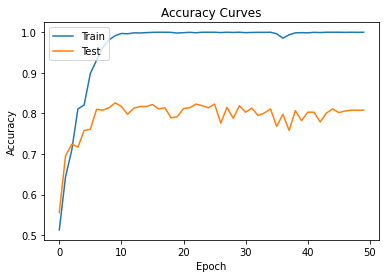

In [66]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

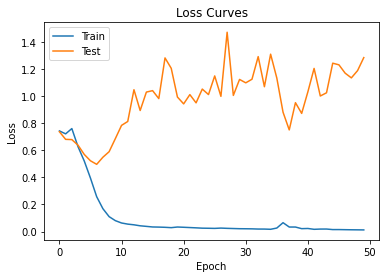

In [67]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# DNN

In [73]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 2
MAX_SEQUENCE_LENGTH = 150

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(num_words, embed_dim,input_length = X_train.shape[1],trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(2, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 150, 128)          1920000   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total params: 1,920,258
Trainable params: 1,920,258
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
trained = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/5
8/8 [==============================] - 1s 143ms/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6926 - val_accuracy: 0.5220
Epoch 2/5
8/8 [==============================] - 1s 103ms/step - loss: 0.6925 - accuracy: 0.5355 - val_loss: 0.6927 - val_accuracy: 0.4890
Epoch 3/5
8/8 [==============================] - 1s 103ms/step - loss: 0.6919 - accuracy: 0.5065 - val_loss: 0.6925 - val_accuracy: 0.4890
Epoch 4/5
8/8 [==============================] - 1s 103ms/step - loss: 0.6913 - accuracy: 0.5082 - val_loss: 0.6914 - val_accuracy: 0.5060
Epoch 5/5
8/8 [==============================] - 1s 103ms/step - loss: 0.6906 - accuracy: 0.5290 - val_loss: 0.6909 - val_accuracy: 0.5080


In [75]:
dnn = trained.history['val_accuracy']

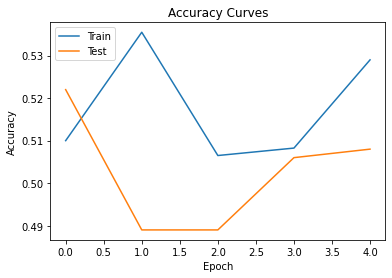

In [77]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

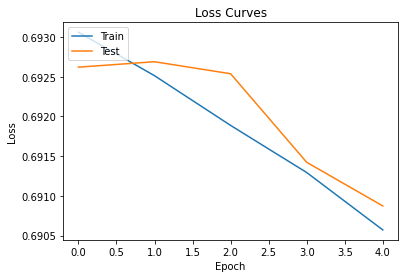

In [78]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CNN + LSTM

In [81]:
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(num_words, embed_dim,input_length = X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1566, 128)         1920000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1566, 32)          12320     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 783, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 202       
Total params: 1,985,722
Trainable params: 1,985,722
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
trained = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/5
8/8 [==============================] - 2s 189ms/step - loss: 0.6936 - accuracy: 0.4952 - val_loss: 0.6935 - val_accuracy: 0.4890
Epoch 2/5
8/8 [==============================] - 1s 151ms/step - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6951 - val_accuracy: 0.4900
Epoch 3/5
8/8 [==============================] - 1s 149ms/step - loss: 0.6938 - accuracy: 0.5080 - val_loss: 0.6936 - val_accuracy: 0.4890
Epoch 4/5
8/8 [==============================] - 1s 152ms/step - loss: 0.6955 - accuracy: 0.5042 - val_loss: 0.6949 - val_accuracy: 0.4860
Epoch 5/5
8/8 [==============================] - 1s 149ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6934 - val_accuracy: 0.4890


In [83]:
hyd = trained.history['val_accuracy']

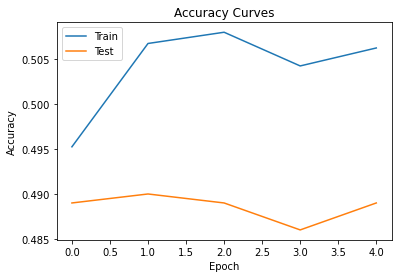

In [84]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

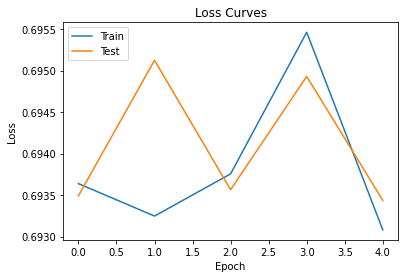

In [85]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Accuracy Comparsion

In [87]:
accuracies = [LR, RF, AB, MNB,svm,cat, E,rnn[9],cnn[9],lstm,dnn[4],hyd[4]]

In [88]:
for i in range(0, len(accuracies)):
    accuracies[i] = accuracies[i]*100
    print(accuracies[i])

85.15151515151516
85.15151515151516
71.57575757575756
83.51515151515152
63.57575757575758
82.60606060606061
83.51515151515152
59.299999475479126
48.80000054836273
80.29999732971191
50.80000162124634
48.899999260902405


In [89]:
models = ['Logistic Regression' , 'Random Forest', 'Decision Tree', 'MNB','SVM','CATBOOSTING' ,'Voting Classifier','RNN','CNN','LSTM','DNN','CNN+LSTM']

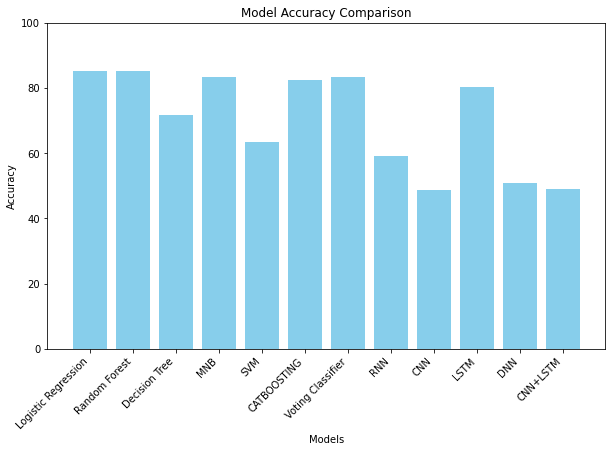

In [91]:
import matplotlib.pyplot as plt

#models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'MNB', 'SVM', 'CATBOOSTING', 'Voting Classifier', 'RNN', 'CNN', 'LSTM', 'DNN', 'CNN+LSTM']
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limit to ensure proper scale
plt.show()
